In [136]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, AvgPool2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from keras.datasets.mnist import load_data

from IPython.display import display, HTML

ERROR! Session/line number was not unique in database. History logging moved to new session 211


In [76]:
(x_train, y_train), (x_test, y_test) = load_data()

def scaleBetweenMinus1And1(x):
    mean = np.mean(x)
    maxVal = np.max(x)
    minVal = np.min(x)
    return (x - mean)/(maxVal - minVal)

x_train = scaleBetweenMinus1And1(x_train)
x_test = scaleBetweenMinus1And1(x_test)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

filter_count = 8
kernel_size = 3
pooling_size = 2

model = Sequential([
  Conv2D(filter_count, kernel_size, input_shape=(28, 28, 1)),
  MaxPool2D(pool_size=pooling_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

hist = model.fit(
  x_train,
  to_categorical(y_train),
  epochs=3,
  validation_data=(x_test, to_categorical(y_test)),
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3


60000/60000 [==============================] - 16s 268us/sample - loss: 0.3313 - accuracy: 0.9075 - val_loss: 0.2030 - val_accuracy: 0.9442
Epoch 2/3
60000/60000 [==============================] - 17s 290us/sample - loss: 0.1721 - accuracy: 0.9513 - val_loss: 0.1451 - val_accuracy: 0.9597
Epoch 3/3
60000/60000 [==============================] - 18s 302us/sample - loss: 0.1294 - accuracy: 0.9626 - val_loss: 0.1188 - val_accuracy: 0.9646


In [3]:
im = np.expand_dims(x_train[4].astype(np.float32), 0)
out = model.layers[0].call(im)
out = out.numpy()

In [87]:
def generateImages(layer, X):
    return layer.call(X).numpy()

imagesPerRow = 8
pageWidthInch = 16
def showFeatureMaps(featureMaps, name=None, out_format=None):
    featureMaps = np.squeeze(featureMaps.numpy())
    filterSize = np.shape(featureMaps)[2]
    rows = np.ceil(filterSize/imagesPerRow).astype(int)
    cols = np.min([filterSize, imagesPerRow])
    fig = plt.figure(figsize=(pageWidthInch, int(float(pageWidthInch)/imagesPerRow*rows)))
    if name is not None:
        if out_format is not None:
            fig.suptitle(f"{name} {str(out_format)}")
        else:
            fig.suptitle(name)
    for i in range(rows):
        for j in range(cols):
            if cols*i+j >= filterSize:
                break
            fig.add_subplot(rows, cols, cols*i+j+1)
            plt.imshow(featureMaps[:,:,cols*i+j], cmap="Greys")
            plt.axis('off')

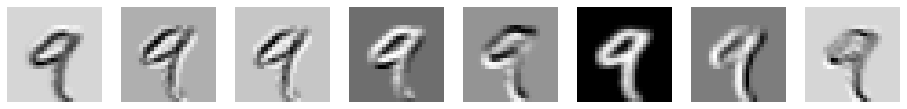

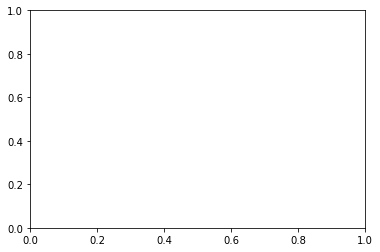

In [32]:
out = np.squeeze(out)
filterSize = np.shape(out)[2]
rows = np.ceil(filterSize/imagesPerRow).astype(int)
cols = np.min([filterSize, imagesPerRow])
fig, axs = plt.subplots(rows, cols, figsize=(pageWidthInch, int(float(pageWidthInch)/imagesPerRow*rows)))
# Case 1 row
if rows == 1:
    for j in range(cols):
        axs[j].imshow(out[:,:,j], cmap="Greys")
        axs[j].axis('off')
else: # multiple rows
    for i in range(rows):
        for j in range(cols):
            if cols*i+j >= filterSize: # Fill remaining images in last row with blanks
                axs[i, j].imshow(out[:,:,filterSize-1], alpha=0, cmap="Greys")
            else:
                axs[i, j].imshow(out[:,:,cols*i+j], cmap="Greys")
            axs[i, j].axis('off')
fig,ax = plt.subplots(1,1)

In [222]:
circleSize = 20 # pixels
padding = 0.5 # * circleSize
def showNodes(X, name=None):
    X = np.squeeze(X.numpy())
    if len(X) > 32 or len(X) is 0:
        return
    fig = plt.figure(figsize=(pageWidthInch, pageWidthInch/8))
    if name is not None:
        fig.suptitle(name)
    for x in range(len(X)):
        ax = fig.add_subplot(1, len(X), x+1, adjustable='box', aspect='equal')
        plt.autoscale(enable=True)
        ax.set_axis_off()
        ax.add_patch(plt.Circle((circleSize/2, circleSize/2), circleSize/2, color=(0,0,0,1-(X[x]+1)/2), ec='k'))
        ax.set_title(label=np.round(X[x], 4), y=-0.4)

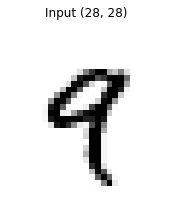

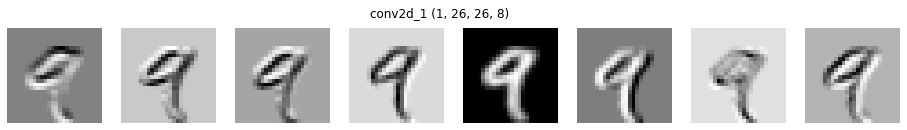

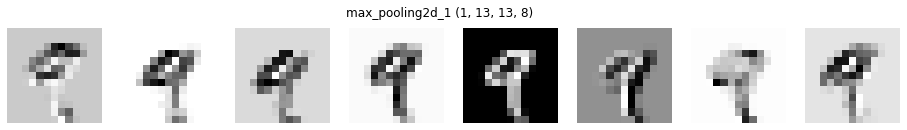

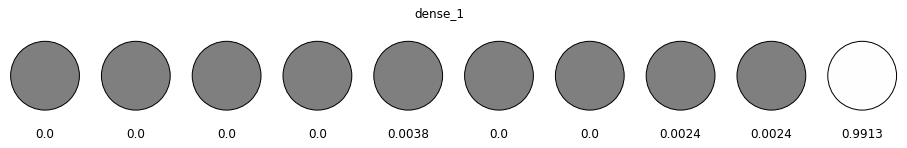

In [226]:
X = im
fig = plt.figure(figsize=(3,3))
fig.suptitle(f"Input {np.squeeze(im).shape}")
ax = fig.add_subplot(1,1,1)
ax.axis('off')
ax.imshow(np.squeeze(im), cmap='Greys')
for layer in model.layers:
    X = layer.call(X)
    if isinstance(layer, (Conv2D, MaxPool2D, AvgPool2D)):
        showFeatureMaps(X, name=layer.name, out_format=X.shape)
    elif isinstance(layer, (Dense)):
        showNodes(X, name=layer.name)
    #else:
        #print(layer.name, X.shape)

In [91]:
print(model.layers[2].output_shape)

(None, 1352)
